## Datetime index and resampling

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc = {'figure.figsize':(10,8)})
sns.set_style('darkgrid')

__Timeseries__ is a set of data points indexed in time order.

# 1. Datetime index

In [2]:
df = pd.read_csv('aapl.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,7-Jul-17,142.90,144.75,142.90,144.18,19201712
1,6-Jul-17,143.02,143.50,142.41,142.73,24128782
2,5-Jul-17,143.69,144.79,142.72,144.09,21569557
3,3-Jul-17,144.88,145.30,143.10,143.50,14277848
4,30-Jun-17,144.45,144.96,143.78,144.02,23024107


In [3]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [4]:
type(df['Date'][0])

str

Using argument __parse_dates__ in the `pd.read_csv()`, to convert the Date column in date format.

In [5]:
df = pd.read_csv('aapl.csv', parse_dates=['Date'])
df.head()

,Date,Open,High,Low,Close,Volume
0,2017-07-07,142.90,144.75,142.90,144.18,19201712
1,2017-07-06,143.02,143.50,142.41,142.73,24128782
2,2017-07-05,143.69,144.79,142.72,144.09,21569557
3,2017-07-03,144.88,145.30,143.10,143.50,14277848
4,2017-06-30,144.45,144.96,143.78,144.02,23024107


So the data type changed to timestamp.

In [6]:
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

In [7]:
type(df['Date'][0])

pandas._libs.tslib.Timestamp

In [8]:
df['Date'].dt.day[1:5]

1     6
2     5
3     3
4    30
Name: Date, dtype: int64

In [9]:
df['Date'].dt.month[:8]

0    7
1    7
2    7
3    7
4    6
5    6
6    6
7    6
Name: Date, dtype: int64

In [10]:
df['Date'].dt.year[:8]

0    2017
1    2017
2    2017
3    2017
4    2017
5    2017
6    2017
7    2017
Name: Date, dtype: int64

Now i am changing the date column as index.

In [11]:
df= df.set_index(['Date'])
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-07,142.90,144.75,142.90,144.18,19201712
2017-07-06,143.02,143.50,142.41,142.73,24128782
2017-07-05,143.69,144.79,142.72,144.09,21569557
2017-07-03,144.88,145.30,143.10,143.50,14277848
2017-06-30,144.45,144.96,143.78,144.02,23024107


In [12]:
df.index

DatetimeIndex(['2017-07-07', '2017-07-06', '2017-07-05', '2017-07-03',
               '2017-06-30', '2017-06-29', '2017-06-28', '2017-06-27',
               '2017-06-26', '2017-06-23',
               ...
               '2016-07-22', '2016-07-21', '2016-07-20', '2016-07-19',
               '2016-07-18', '2016-07-15', '2016-07-14', '2016-07-13',
               '2016-07-12', '2016-07-11'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

#### Advantages of setting Date as index

Retrieve Jan 2017 stock prices.

In [13]:
df['2017-01']

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-31,121.15,121.39,120.62,121.35,49200993
2017-01-30,120.93,121.63,120.66,121.63,30377503
2017-01-27,122.14,122.35,121.60,121.95,20562944
2017-01-26,121.67,122.44,121.60,121.94,26337576
2017-01-25,120.42,122.10,120.28,121.88,32586673
2017-01-24,119.55,120.10,119.50,119.97,23211038
2017-01-23,120.00,120.81,119.77,120.08,22050218
2017-01-20,120.45,120.45,119.73,120.00,32597892
2017-01-19,119.40,120.09,119.37,119.78,25597291


### Find average price of apples stock in Jan 2017

> [Closing price](https://www.investopedia.com/terms/c/closingprice.asp) : The closing price is the final price at which a security is traded on a given trading day. The closing price represents the most up-to-date valuation of a security until trading commences again on the next trading day.


In [14]:
# To find the closing price of each day
df['2017-01']['Close']

Date
2017-01-31    121.35
2017-01-30    121.63
2017-01-27    121.95
2017-01-26    121.94
2017-01-25    121.88
2017-01-24    119.97
2017-01-23    120.08
2017-01-20    120.00
2017-01-19    119.78
2017-01-18    119.99
2017-01-17    120.00
2017-01-13    119.04
2017-01-12    119.25
2017-01-11    119.75
2017-01-10    119.11
2017-01-09    118.99
2017-01-06    117.91
2017-01-05    116.61
2017-01-04    116.02
2017-01-03    116.15
Name: Close, dtype: float64

Now to get the average stock price of apples in month of Jan

In [15]:
df['2017-01']['Close'].mean()

119.57000000000001

Also we can use the date as an index in dataframe

In [16]:
df['2017-01-03']

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,115.8,116.33,114.76,116.15,28781865


We can also get details of a range of weeks

In [17]:
df['2017-01-07':'2017-01-01']

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-06,116.78,118.16,116.47,117.91,31751900
2017-01-05,115.92,116.86,115.81,116.61,22193587
2017-01-04,115.85,116.51,115.75,116.02,21118116
2017-01-03,115.80,116.33,114.76,116.15,28781865


 date must from the latest to the earliest date.

In [18]:
df['2017-02-07':'2017-02-01']

,Open,High,Low,Close,Volume
Date,,,,,
2017-02-07,130.54,132.09,130.45,131.53,38183841
2017-02-06,129.13,130.50,128.90,130.29,26845924
2017-02-03,128.31,129.19,128.16,129.08,24507301
2017-02-02,127.98,129.39,127.78,128.53,33710411
2017-02-01,127.03,130.49,127.01,128.75,111985040


But we wont get data with this.

In [19]:
df['2017-02-01':'2017-02-07']

,Open,High,Low,Close,Volume
Date,,,,,


So date must from the latest to the earliest date.

# 2. Resampling

To know about monthly/weekly data.

__Can be done by selecting a column and resample to a monthly frequency and we are calculating the mean of that.__

In [21]:
df['Close'].resample('M').mean()

Date
2016-07-31     99.473333
2016-08-31    107.665217
2016-09-30    110.857143
2016-10-31    115.707143
2016-11-30    110.154286
2016-12-31    114.335714
2017-01-31    119.570000
2017-02-28    133.713684
2017-03-31    140.617826
2017-04-30    142.886842
2017-05-31    152.227727
2017-06-30    147.831364
2017-07-31    143.625000
Freq: M, Name: Close, dtype: float64

Above shows the monthly average of Close price.   

We can also make a plot of prices of monthly frequency.

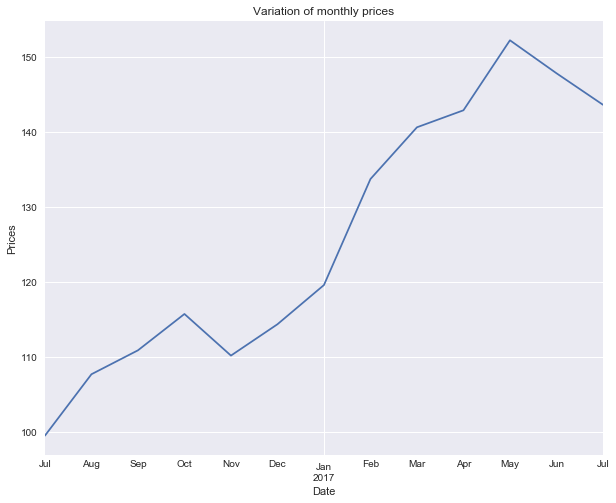

In [27]:
df['Close'].resample('M').mean().plot();
plt.ylabel('Prices');
plt.title('Variation of monthly prices');

Plotting the prices of weekly frequencies. __Weekly - W__

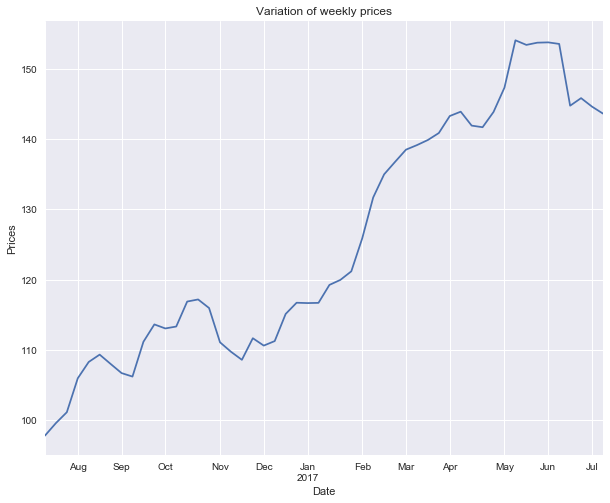

In [28]:
df['Close'].resample('W').mean().plot();
plt.ylabel('Prices');
plt.title('Variation of weekly prices');

To see the __quarterly frequency Q__ prices.

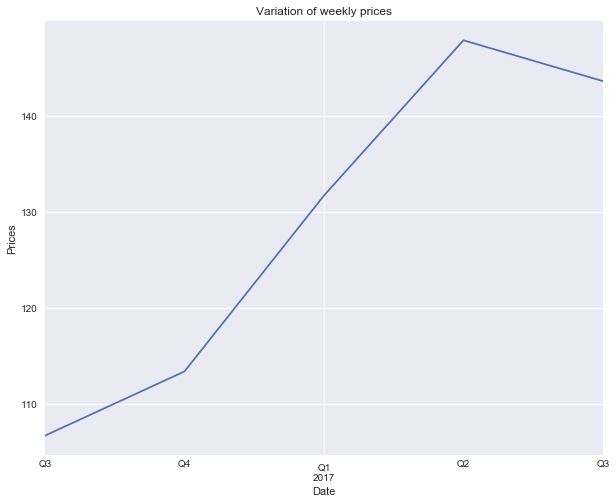

In [29]:
df['Close'].resample('Q').mean().plot();
plt.ylabel('Prices');
plt.title('Variation of weekly prices');

Making a bar chart for time series

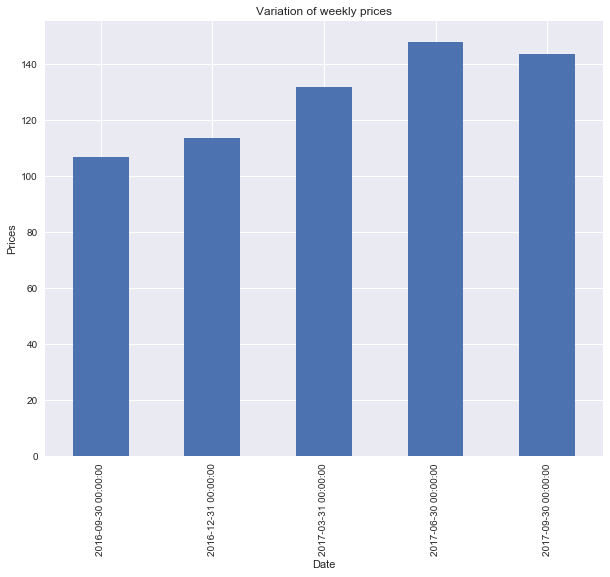

In [31]:
df['Close'].resample('Q').mean().plot(kind='bar');
plt.ylabel('Prices');
plt.title('Variation of weekly prices');